In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'


df = pd.read_csv("Jungle Scout CSV - pour over kettle.csv", index_col=False, header=0, skiprows=2)

print(df)

           ASIN                                       Product Name  \
0   B0115V6TLG   Elementi Stainless Steel Electric Kettle for P...   
1   B000EVPGSQ    Fino Pour Over Coffee and Tea Kettle  4 1/4-Cup    
2   B01E2O21NS   POUR OVER Coffee Kettle 1.2L - Stop Burning Yo...   
3   B01GXC224U   Pour Over Drip Kettle - High Quality Stainless...   
4   B01CF1G4GK   Osaka 1 Liter Electric Gooseneck Drip Kettle f...   
5   B010D4W1DG    Fino Pour Over Coffee and Tea Kettle  4 1/4-Cup    
6   B00VM8YGEA    Fino Pour Over Coffee and Tea Kettle  4 1/4-Cup    
7   B000EVPGTU   Fino Pour Over Coffee Kettle  18/8 Stainless S...   
8   B011FROW64    Fino Pour Over Coffee and Tea Kettle  4 1/4-Cup    
9   B01ATWDUU0   Pour Over Gooseneck Kettle by Alpha & Sigma [I...   
10  B01B1VGWDU   Pour Over Coffee Drip Kettle - Gooseneck Coffe...   
11  B00T2WFHH8    Fino Pour Over Coffee and Tea Kettle  4 1/4-Cup    
12  B01F7V9WL4   Coffee & Tea Kettle for Pour Over Coffee Makin...   
13  B018WDAQBE   POU

In [2]:
sales = df[' Est. Monthly Sales']

a = [df[" Est. Monthly Sales"] == 'N.A.']

a = a[0]

mask = sales.mask(a)

mask = mask.dropna()

numbers = pd.to_numeric(mask)

numbers.describe()

numbers = numbers.tolist()

numbers = np.asarray(numbers)

total_montly_units = numbers.sum()

print("The total unit volume is", total_montly_units)


The total unit volume is 8143


In [3]:
revenue = df[' Est. Monthly Revenue']

b = [df[" Est. Monthly Revenue"] == 'N.A.']

b = b[0]

mask = revenue.mask(b)

mask = mask.dropna()

numbers = pd.to_numeric(mask)

numbers.describe()

numbers = numbers.tolist()

numbers = np.asarray(numbers)

total_montly_revenue = numbers.sum()

revenue_number_products = len(numbers)



# Monthly Unit Sales

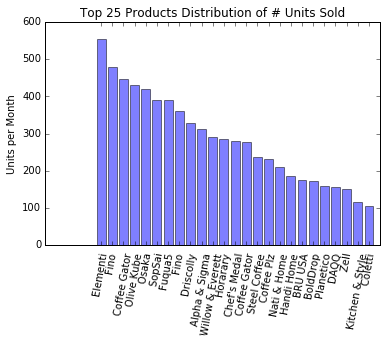

In [4]:
sample = df[[' Brand', ' Est. Monthly Sales']]

top25 = sample[:25]

top25[' Est. Monthly Sales'] = pd.to_numeric(top25[' Est. Monthly Sales'])

brand = top25[' Brand'].tolist()

top25units = top25[' Est. Monthly Sales'].tolist()

 
rank = brand # this should be the brands, may need to be strings
y_pos = np.arange(len(rank))
units = top25units #this should be a list of the values for number of units

plt.bar(y_pos, units, align='center', alpha=0.5)
plt.xticks(y_pos, rank, rotation=80 )
plt.ylabel('Units per Month')
plt.title('Top 25 Products Distribution of # Units Sold')

 
plt.show()

# Monthly Revenue

                Brand   Est. Monthly Revenue
0           Elementi                24924.46
1               Fino                12372.57
2       Coffee Gator                18272.62
3         Olive Kube                12074.40
4              Osaka                21045.79
5             SopSai                10233.60
6             Fuqua5                10073.70
7               Fino                10252.80
8          Driscolly                 8498.07
9      Alpha & Sigma                 8736.00
10  Willow & Everett                 7537.10
11          Horarary                 7387.38
12      Chef's Medal                 9756.63
13      Coffee Gator                10555.66
14      Steel Coffee                 5443.89
15        Coffee Plz                 5772.69
16       Nati & Home                 5908.00
17        Handi Home                 2608.65
18           BRU USA                 6327.20
19          BoldDrop                 8644.81
20         Planetico                 5474.70
21        

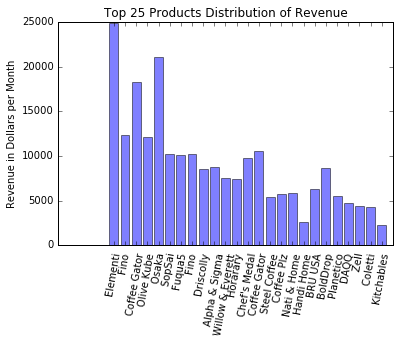

The monthly revenue for the top 25 products is $ 227433.41
The total monthly revenue for the entire market is $ 257511.58 with 54 total products
The top 25 products account for 88.32 percent of the entire market


In [5]:
column = ' Est. Monthly Revenue'

sample = df[[' Brand', column]]

#remove rows that have NA in the column

sample = sample[sample[column] != 'N.A.']

top25 = sample[:25]

top25[column] = pd.to_numeric(top25[column])

brand = top25[' Brand'].tolist()

top25units = top25[column].tolist()

 
rank = brand # this should be the brands, may need to be strings
y_pos = np.arange(len(rank))
units = top25units #this should be a list of the values for number of units

plt.bar(y_pos, units, align='center', alpha=0.5)
plt.xticks(y_pos, rank, rotation=80 )
plt.ylabel('Revenue in Dollars per Month')
plt.title('Top 25 Products Distribution of Revenue')

print(top25)
 
plt.show()

top25_monthly_revenue = np.sum(top25units)

print("The monthly revenue for the top 25 products is $", top25_monthly_revenue)

print("The total monthly revenue for the entire market is $", total_montly_revenue, "with", revenue_number_products, "total products")

top25_marketshare = 100 * top25_monthly_revenue / total_montly_revenue

print("The top 25 products account for %.2f percent of the entire market" % top25_marketshare)




# Pricing

                Brand   Price
0           Elementi    44.99
1               Fino    25.83
2       Coffee Gator    40.97
3         Olive Kube    27.95
4              Osaka    49.99
5             SopSai    26.24
6             Fuqua5    25.83
7               Fino    28.48
8          Driscolly    25.83
9      Alpha & Sigma    28.00
10  Willow & Everett    25.99
11          Horarary    25.83
12      Chef's Medal    34.97
13      Coffee Gator    37.97
14      Steel Coffee    22.97
15        Coffee Plz    24.99
16       Nati & Home    28.00
17        Handi Home    13.95
18           BRU USA    35.95
19          BoldDrop    49.97
20         Planetico    34.65
21              DAQQ    29.99
22              Zell    28.95
24           Coletti    39.97
25        Kitchables    32.97


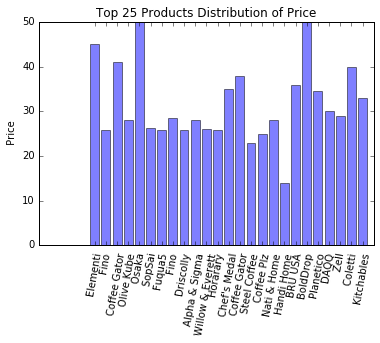

The average price is $31.65 with a standard deviation of $8.60
The max price is $49.99
The min price is $13.95


In [6]:
column = ' Price'

sample = df[[' Brand', column]]

sample = sample[sample[column] != 'N.A.']

top25 = sample[:25]

top25[column] = pd.to_numeric(top25[column])

brand = top25[' Brand'].tolist()

top25units = top25[column].tolist()


description = sample[column]

a = [sample[column] == 'N.A.']

a = a[0]

mask = description.mask(a)

mask = mask.dropna()

numbers = pd.to_numeric(mask)[:25]

stats = numbers.describe()

 
rank = brand # this should be the brands, may need to be strings
y_pos = np.arange(len(rank))
units = top25units #this should be a list of the values for number of units

plt.bar(y_pos, units, align='center', alpha=0.5)
plt.xticks(y_pos, rank, rotation=80 )
plt.ylabel(column)
plt.title('Top 25 Products Distribution of Price')

print(top25)
 
plt.show()

print('The average price is $%.2f with a standard deviation of $%.2f' % (stats['mean'], stats['std']))

print('The max price is $%.2f' % stats['max'])

print('The min price is $%.2f' % (stats['min']))

